# 1 Camera calibration

In [22]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
%matplotlib inline

# Define number of chessboard inside corner points
chess_corner_x = 9
chess_corner_y = 6

# Read in and create a list of calibration images
calibration_images = glob.glob("camera_cal/calibration*.jpg")

# Add container for filenames of images with detected edges and non-detected edges
img_corner_det_true = {}
img_corner_det_false = {}

# Array containers to store object and image points from all images
obj_points = [] # 3D points in real world
img_points = [] # 2D points in image

# Prepare object points like (0,0,0), (1,0,0), (2,0,0), ...., (7,5,0)
objp = np.zeros((chess_corner_x * chess_corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:chess_corner_x,0:chess_corner_y].T.reshape(-1,2) # x, y coordinates  

for fname in calibration_images:
    # Read in each image
    image = mpimg.imread(fname)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray,(chess_corner_x,chess_corner_y), None)
    
    # If corner points are found, add object points, image points
    if ret == True:
        img_points.append(corners)
        obj_points.append(objp)
        
        # Draw and display the corners
        image = cv2.drawChessboardCorners(image,(chess_corner_x, chess_corner_y), corners, ret)
        
        # Append images with corners to dictionary of images
        img_corner_det_true[fname] = image        
    
    else:
        # Append images with no corners identified to dictionary of images
        img_corner_det_false[fname] = image   


All images with identified corners:


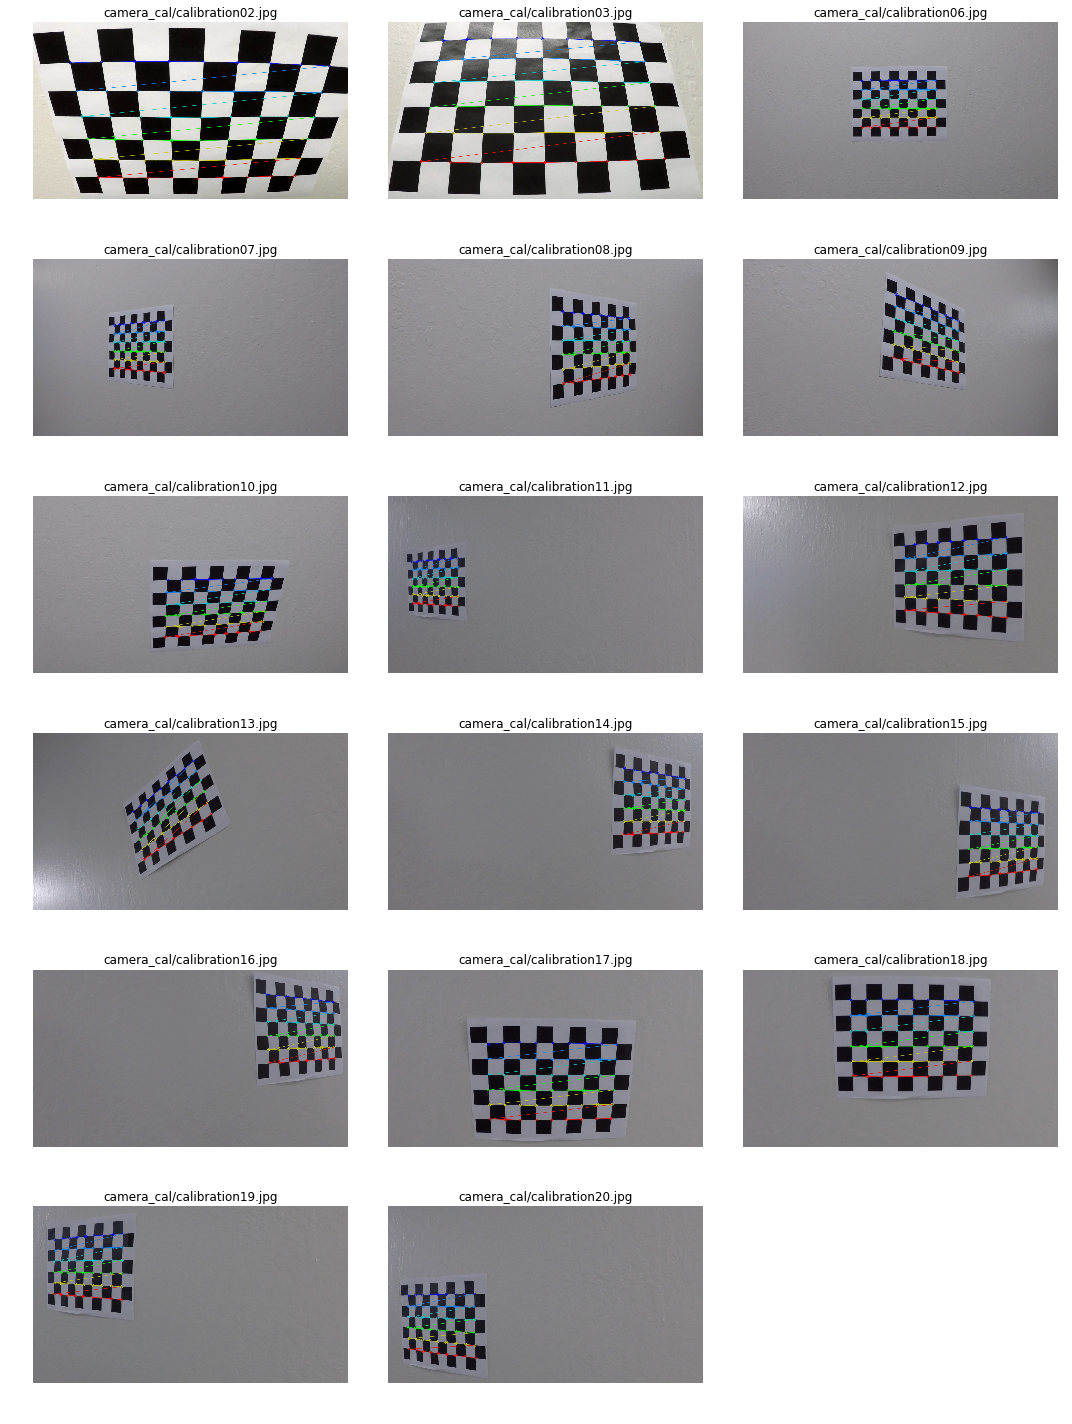


All images for which no corners could be identified:


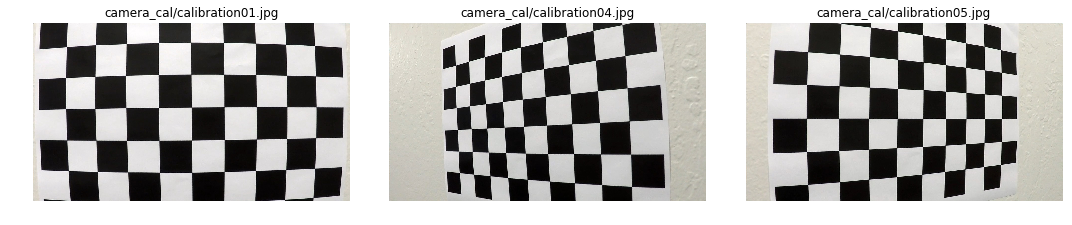

'     \nplt.imshow(img_corner_det_true["camera_cal/calibration2.jpg"])\nplt.axis("off")\nplt.show()\n\n\nfig, axes = plt.subplots(1,3,figsize = (15,15))\nfor i, ax in enumerate(axes.flat):\n    xplot = x\n    title = \'center camera\'\n    if i == 0:\n        xplot = xl\n        title = \'left camera\'\n    if i == 2:\n        xplot = xr   \n        title = \'right camera\'\n    ax.imshow(xplot) \n    ax.axis(\'off\')\n    ax.set_title(title)\n\nplt.axis(\'off\')\nplt.tight_layout()\nplt.show()\n'

In [25]:
# Plot images with corners, save them and identify images for which no corners have been identified

def plot_images_from_dict(input_dictionary, images_per_line = 5, figw = 15, figh = 15, save = False):
    """
    Input:
    input_dictonary (dict): Input a dictionary with file path as keys and images as values
    images_per_line (int): Defines how many images will be displayed per line
    figw (int): Defines the width of the overall output figure
    figh (int): Defines the hight of the overall output figure
    save (bool): Determines whether the images with be saved under the same image path with the filename extension "_annotated"
                    useful if images were modified)    
    """
    
    # Define required number of lines and columns in plot to create subplots
    num_images = len(input_dictionary)
    images_per_column = int(math.ceil(num_images/images_per_line))
    
    # Create subplots
    fig, axes = plt.subplots(images_per_column,images_per_line,figsize = (figw,figh))
    
    # Remove axis for all subplots
    for i, ax in enumerate(axes.flat):
        ax.axis("off")
    
    # Display all images
    for ax, image in zip(axes.flat,sorted(input_dictionary.keys())):
        ax.imshow(input_dictionary[image])
        ax.set_title(image)
        # Save all images if "save"-function was activated (to be used if images were modified before)
        if save:
            img_out_name = "{}_annotated.png".format(image[:image.find(".")])
            plt.imsave(img_out_name,input_dictionary[image].astype(np.uint8))
        
    # Output plot with all images    
    plt.tight_layout()
    plt.axis("off")
    plt.show()

    
# Return plot of all images with corners found (and save them to "..._annotated.png"-files) -> To execute second part in parentheses set last function argument to "True" (not activated as computation takes a few seconds) 
print("\nAll images with identified corners:")
plot_images_from_dict(img_corner_det_true,3,15,20,False)

# Return plot of all images for which no corners have been identified (verify whether reason is that not all required corners are on the image)
print("\nAll images for which no corners could be identified:")
plot_images_from_dict(img_corner_det_false,3,15,6,False)

In [27]:
# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points,img_points, gray.shape[::-1],None,None)

# 2 Pipeline (test images)

## 2.1 Distortion correction

(720, 1280, 3)


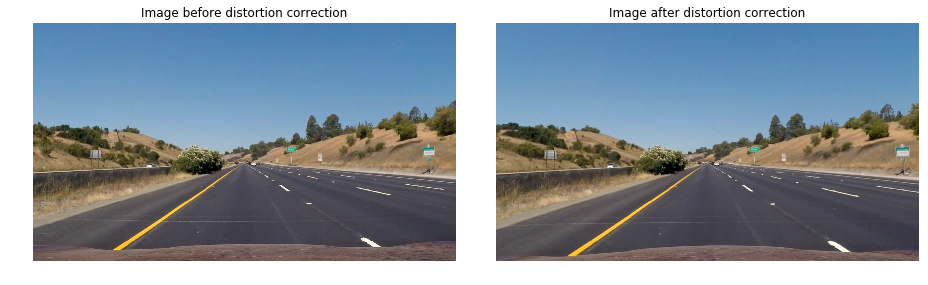

In [34]:
def plot_image_comparision(img_before, img_after, event):
    images_per_column = 1
    images_per_line = 2
    figw = 13
    figh = 7
    fig, axes = plt.subplots(images_per_column,images_per_line,figsize = (figw,figh))
    for i, ax in enumerate(axes.flat):
        if i == 0:
            ax.imshow(img_before)
            ax.axis("off")
            ax.set_title("Image before {}".format(event))
        if i == 1:
            ax.imshow(img_after)
            ax.axis("off")
            ax.set_title("Image after {}".format(event))
    plt.tight_layout()
    plt.axis("off")
    plt.show()


img = mpimg.imread("test_images/straight_lines1.jpg")
print(img.shape)
dst = cv2.undistort(img,mtx,dist,None,mtx)
plot_image_comparision(img,dst,"distortion correction")
plt.imsave("test_images/straight_lines1_disCor.png",dst)

## 2.2 Create threshholded binary image

In [ ]:
# Create dynamic threshholding based on the brightness of the image

# Perform gradient on image

# Perform color channel selection

## 2.3 Perform perspective transform

## 2.4 Identify lane-line pixels and fit with polynomial

## 2.5 Calculate radius of curvature and position of vehicle

## 2.6 Transform lane view back to initial image

# 3 Apply pipeline on video